# Calculating Thrust Coefficient

In this assignment, we will calculate the _thrust coefficient_ and _drag coefficient_ of the Crazyflie.

The force, $F_i$, and moment, $M_i$, produced by each motor is given by

$$\begin{align}F_i = k_f \omega_i^2 & & M_i = k_m \omega_i^2\end{align}$$

Here, $\omega_i$ is the rotational speed of the motor, $k_f$ is the thrust coefficient, and $k_m$ is the drag coefficient. The experimental procedure used to find $k_f$ is straightforward. Since $\omega_i^2$ is linearly related to $F_i$ and $\omega_i^2$ can be set to arbitrary values, we can simply measure the thrust produced at different values of $\omega_i$ and perform a _linear regression_, which is another name for calculating the line of best fit.

## Linear Regression Overview

Linear regression is a simple but useful statistical tool. This section will provide a quick overview of the technique in case you have not already seen it in a statistics or linear algebra class.

Consider the following scenario. We have a data set $\{(\mathbf{x}_i, y_i)\}_{i = 1}^N$, where $\mathbf{x}_i \in \mathbb{R}^n$ represents the input to some function and $y_i \in \mathbb{R}$ represents the measured output. We assume that the output is linearly related to the input and that there is some amount of additive random noise $e_i$ representing measurement error, i.e.

$$y_i = \mathbf{a}^{\top}\mathbf{x}_i + e_i$$

Our goal is to characterize the mapping between $\mathbf{x}$ and $\mathbf{y}$ by finding $\mathbf{a}$. To do so, we first recognize that we can write the $N$ constraints given by the previous equation as

$$\mathbf{y} = \mathbf{X}\mathbf{a} + \mathbf{e}$$

where

$$\begin{align}\mathbf{y} = \begin{bmatrix}y_1\\ \vdots \\ y_N\end{bmatrix} & & \mathbf{X} = \begin{bmatrix}\mathbf{x}_1^{\top}\\ \vdots \\ \mathbf{x}_N^{\top}\end{bmatrix} & & \mathbf{e} = \begin{bmatrix}e_1\\ \vdots \\ e_N\end{bmatrix}\end{align}$$.

If $\mathbf{e}$ is known, we could simply attempt to invert $\mathbf{X}$ to compute $\mathbf{a}$. However, since the measurement noise is rarely known, we cannot persue this avenue. Moreover, $\mathbf{X}$ is rarely square and / or of full rank. We often choose $N >> n$ in order to compensate for the fact that some of our measurments will have significant errors. So, instead, we will try to find a value for $\mathbf{a}$ that tries to get "as close as possible" to satisfying

$$\mathbf{y} = \mathbf{X}\mathbf{a}$$.

While there are a number of ways we can define "as close as possible" formally, the one that we are going to pick is the square of the $2$-norm of the difference between the left and right hand sides of the previous equation. This choice is made for a number of practical and analytic reasons that are beyond the scope of this class. This choice corresponds to the optimization problem

$$\underset{\mathbf{a}}{\mathrm{minimize}}\ \frac{1}{2}\|\mathbf{y} - \mathbf{X}\mathbf{a}\|_2^2$$

This kind of optimization problem is known as a _least-squares problem_ and is a kind of _unconstrained quadratic program_. The details of what that means are unimportant, but methods for solving these problems are very well-studied, and methods for doing so are already implemented as part of SciPy.

## Implementation

First, we are going to import the libraries and data that we need. Feel free to use any function in these libraries to help in the assignment.

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import lsq_linear

npzfile = np.load('quad_data/thrust_data.npz')
thrusts = npzfile['thrusts']
grams = npzfile['grams']

You will use the `lsq_linear` function to solve the least-squares problem described above. It's documentation is available [here](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.lsq_linear.html).

First, we need to discuss an implementation detail. Internally, the Crazyflie doesn't work in terms of commanded angular velocities for the rotors but instead in terms of a percentage of the maximum angular velocity of which the rotors are capable. Moreover, this quantity is represented as a 16-bit integer, so values range from $0$ to $2^{16}$, with $0$ corresponding to $0$% angular velocity and $2^{16}$ corresponding to $100$% angular velocity. Therefore, for the purposes of writing a controller, we are really interested in measure the value of $k_f$ for the equation

$$F_{tot} = k_f \sum_{i = 1}^4\tilde{\omega}_i^2$$

where $\tilde{\omega}^2_i$ is the percentage of max. angular velocity represented as a 16-bit integer in the manner just described for the $i$th rotor and $F_{tot}$ is the total thrust in _newtons_.

To collect data, we measured the thrust of the quadrotor on a scape while sweeping $\tilde{\omega}_i^2$ through a series of values three different times. The data from this experimented was just imported in the following format:
- `thrusts`: An `np.ndarray` containing $M$ different percentages of max. thrust to which the rotors were set for data collection _in grams_. You will need to convert to Newtons. _All four rotors were set to this value at the same time_.
- `grams`: An `np.ndarray` of dimension $M$-by-$3$. The value in entry `grams[i, j]` corresponds to the thrust, in grams measured at `thrusts[i]` on the `j`th experimental trial.

Your assignment, is to, in the next cell, compute $k_f$ by finding the best-fit line for this data. It's been found in the literature that, for this model of quadrotor, that

$$\frac{k_f}{k_m} \approx 40.7333$$

Therefore, you should also compute $k_m$ once you find $k_f$. Please put these values in the variables `k_f` and `k_m` respectively.

Finally, you can use the following cell to check your work. It plots the data along with the best-fit line you found. If these don't line up (pun unintended), you will need to reevaluate your approach.

<IPython.core.display.Javascript object>


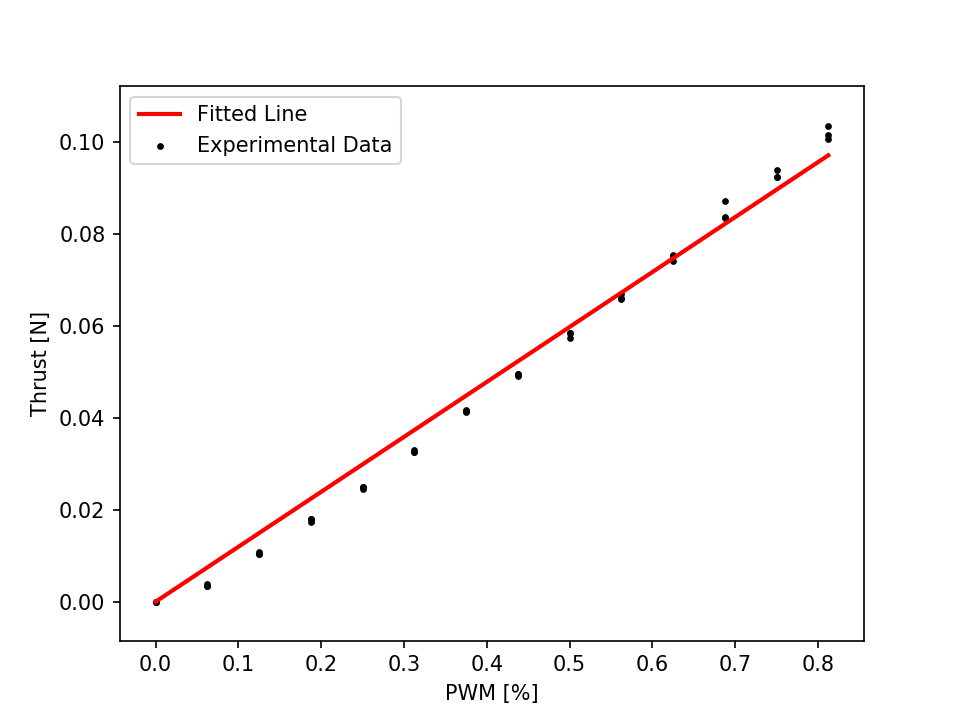

k_f = 1.8221205267714052e-06
k_m = 4.4732910188601685e-08


In [75]:
%matplotlib notebook
for i in range(newtons.shape[1]):
    if i == 0:
        plt.scatter(thrusts, newtons[:, i], c='k', s=5, label='Experimental Data')
    else:
        plt.scatter(thrusts, newtons[:, i], c='k', s=5)

plt.plot(thrusts, k_f * (2 ** 16) * thrusts, c='r', linewidth=2, label='Fitted Line')
plt.xlabel('PWM [%]')
plt.ylabel('Thrust [N]')
plt.legend()

print(f'k_f = {k_f}\nk_m = {k_m}')